<a href="https://colab.research.google.com/github/maciejmochocki/MyRepo/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def funct(x):
  return x*x*x*np.sin(2*x)+np.log(x)

size = 150
low=0
high=12
error=25

XX_train = np.random.uniform(low=low, high=high, size=size)
XX_test = np.random.uniform(low=low, high=high, size=size)
yy_train = funct(XX_train) + np.random.normal(0., error, size)
yy_test = funct(XX_test) + np.random.normal(0., error, size)

print(XX_train.shape, yy_train.shape)

(150,) (150,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

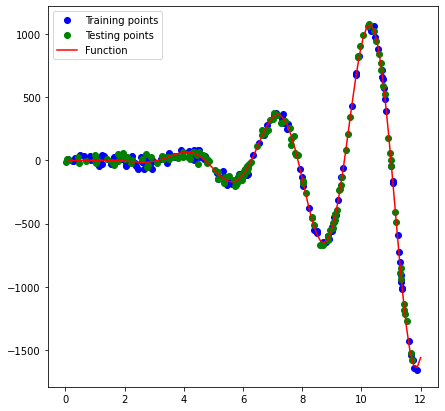

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show

In [ ]:
mean = XX_train.mean(axis=0)
XX_train_n = XX_train-mean
std = XX_train_n.std(axis=0)
XX_train_n /= std

# to samo dla X_test
XX_test_n = XX_test - mean
XX_test_n /= std

# A teraz to samo dla yy_train i yy_test
mean1 = yy_train.mean(axis=0)
yy_train_n = yy_train-mean1
std1 = yy_train_n.std(axis=0)
yy_train_n /= std1
# to samo dla y_test
yy_test_n = yy_test - mean1
yy_test_n /= std1

In [ ]:
# install optuna
! pip install optuna

     |████████████████████████████████| 266kB 5.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 163kB 28.1MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 133kB 24.6MB/s 
     |████████████████████████████████| 112kB 25.7MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
  Created wheel for optuna: filename=optuna-2.3.0-cp36-none-any.whl size=359761 sha256=7565efae05eec0de53b953de41597ca39d487b8612a6cf04781c0411038547e9
  Stored in directory: /root/.cache/pip/wheels/fa/91/19/64b0ec6b964f89c0695a9dc6db6f851d0b54c5381a5c9cadfb
Successfully built optuna
  Created wheel for PrettyTable: filename=prettytable-0.7.2-cp36-none-any.whl size=13700 sha256=998dd417faaf8876ac88f69e053d249b109ab57916c84041864dde8037671b66
  Stored in directory: /root/.cache/pip/whe

In [ ]:
import optuna

def objective(trial):
    units = trial.suggest_discrete_uniform('units', 16,2048,1)
    dropout = trial.suggest_uniform('dropout', 0, 0.8)
    act = trial.suggest_categorical('activation', ['relu','sigmoid','linear'])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    
    model0 = Sequential()
    #.......
    model0.add(Dense(units, activation=act, input_shape=(1,)))
    model0.add(Dropout(dropout))
    model0.add(Dense(units, activation=act))
    model0.add(Dropout(dropout))
    model0.add(Dense(1, activation='linear'))

    # early stoping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

    model0.compile(optimizer=Adam(lr=lr),
                    loss='mean_squared_error',
                    metrics=['mse'])

    model0.fit(XX_train_n,yy_train_n, epochs=500, batch_size=512,verbose=0, validation_data=(XX_test_n, yy_test_n), callbacks=[es])

    results = model0.evaluate(XX_test_n, yy_test_n)

    print('loss test data: ', results[0])
    print('mse test data: ', results[1])

    return results[1]

In [ ]:
study = optuna.create_study()
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner(), sampler=optuna.samplers.TPESampler() )

study.optimize(objective, n_trials=20)

study.best_params  # E.g. {'x': 2.0912375440412942, 'y': 1.0091490823506173}

[I 2020-12-15 00:42:27,899] A new study created in memory with name: no-name-75d83312-8b49-422e-9289-2ae7047c8630
[I 2020-12-15 00:42:27,905] A new study created in memory with name: no-name-a6501ef2-6547-4049-8132-f33ae53f86ae


Epoch 00406: early stopping
5/5 [==============================] - 0s 4ms/step - loss: 0.0452 - mse: 0.0452


[I 2020-12-15 00:42:51,543] Trial 0 finished with value: 0.045244988054037094 and parameters: {'units': 1091.0, 'dropout': 0.4810814801190188, 'activation': 'relu', 'lr': 0.013430079749926981}. Best is trial 0 with value: 0.045244988054037094.


loss test data:  0.045244988054037094
mse test data:  0.045244988054037094
Epoch 00131: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 0.8584 - mse: 0.8584


[I 2020-12-15 00:42:54,868] Trial 1 finished with value: 0.8583734035491943 and parameters: {'units': 294.0, 'dropout': 0.27260294861256523, 'activation': 'sigmoid', 'lr': 0.05925974058521353}. Best is trial 0 with value: 0.045244988054037094.


loss test data:  0.8583734035491943
mse test data:  0.8583734035491943
Epoch 00216: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 0.1104 - mse: 0.1104


[I 2020-12-15 00:43:00,245] Trial 2 finished with value: 0.11039497703313828 and parameters: {'units': 310.0, 'dropout': 0.29203547920527795, 'activation': 'relu', 'lr': 0.05600259642183213}. Best is trial 0 with value: 0.045244988054037094.


loss test data:  0.11039497703313828
mse test data:  0.11039497703313828
Epoch 00083: early stopping
5/5 [==============================] - 0s 3ms/step - loss: 0.8591 - mse: 0.8591


[I 2020-12-15 00:43:03,031] Trial 3 finished with value: 0.8591107130050659 and parameters: {'units': 440.0, 'dropout': 0.014968432626955597, 'activation': 'sigmoid', 'lr': 1.1702106381995107e-05}. Best is trial 0 with value: 0.045244988054037094.


loss test data:  0.8591107130050659
mse test data:  0.8591107130050659
Epoch 00067: early stopping
5/5 [==============================] - 0s 4ms/step - loss: 0.8503 - mse: 0.8503


[I 2020-12-15 00:43:06,769] Trial 4 finished with value: 0.8503291606903076 and parameters: {'units': 976.0, 'dropout': 0.4208085086952463, 'activation': 'linear', 'lr': 0.008859400485777493}. Best is trial 0 with value: 0.045244988054037094.


loss test data:  0.8503291606903076
mse test data:  0.8503291606903076
Epoch 00176: early stopping
5/5 [==============================] - 0s 3ms/step - loss: 0.8555 - mse: 0.8555


[I 2020-12-15 00:43:14,924] Trial 5 finished with value: 0.8554579615592957 and parameters: {'units': 883.0, 'dropout': 0.7256325017292086, 'activation': 'sigmoid', 'lr': 0.0036302705798702062}. Best is trial 0 with value: 0.045244988054037094.


loss test data:  0.8554579615592957
mse test data:  0.8554579615592957
Epoch 00194: early stopping
5/5 [==============================] - 0s 4ms/step - loss: 0.8649 - mse: 0.8649


[I 2020-12-15 00:43:26,009] Trial 6 finished with value: 0.8648902177810669 and parameters: {'units': 1068.0, 'dropout': 0.27770609789934103, 'activation': 'sigmoid', 'lr': 0.030109814477727814}. Best is trial 0 with value: 0.045244988054037094.


loss test data:  0.8648902177810669
mse test data:  0.8648902177810669
Epoch 00130: early stopping
5/5 [==============================] - 0s 4ms/step - loss: 0.8572 - mse: 0.8572


[I 2020-12-15 00:43:33,061] Trial 7 finished with value: 0.8571761846542358 and parameters: {'units': 1040.0, 'dropout': 0.3686856279955417, 'activation': 'sigmoid', 'lr': 0.005947818646941644}. Best is trial 0 with value: 0.045244988054037094.


loss test data:  0.8571761846542358
mse test data:  0.8571761846542358
Epoch 00392: early stopping
5/5 [==============================] - 0s 3ms/step - loss: 0.0220 - mse: 0.0220


[I 2020-12-15 00:43:46,420] Trial 8 finished with value: 0.02196807600557804 and parameters: {'units': 682.0, 'dropout': 0.1260605609179243, 'activation': 'relu', 'lr': 0.006955525882519313}. Best is trial 8 with value: 0.02196807600557804.


loss test data:  0.02196807600557804
mse test data:  0.02196807600557804
Epoch 00175: early stopping
5/5 [==============================] - 0s 4ms/step - loss: 0.8515 - mse: 0.8515


[I 2020-12-15 00:43:58,921] Trial 9 finished with value: 0.8514925837516785 and parameters: {'units': 1299.0, 'dropout': 0.1275238600416694, 'activation': 'linear', 'lr': 0.044052254269271646}. Best is trial 8 with value: 0.02196807600557804.


loss test data:  0.8514925837516785
mse test data:  0.8514925837516785
5/5 [==============================] - 0s 7ms/step - loss: 0.0117 - mse: 0.0117


[I 2020-12-15 00:45:09,308] Trial 10 finished with value: 0.011738891713321209 and parameters: {'units': 1970.0, 'dropout': 0.03182466491719216, 'activation': 'relu', 'lr': 0.0002659409804060432}. Best is trial 10 with value: 0.011738891713321209.


loss test data:  0.011738891713321209
mse test data:  0.011738891713321209
5/5 [==============================] - 0s 7ms/step - loss: 0.3128 - mse: 0.3128


[I 2020-12-15 00:46:16,652] Trial 11 finished with value: 0.3127578794956207 and parameters: {'units': 1906.0, 'dropout': 0.006029251119957252, 'activation': 'relu', 'lr': 0.00011748755179107809}. Best is trial 10 with value: 0.011738891713321209.


loss test data:  0.3127578794956207
mse test data:  0.3127578794956207
Epoch 00497: early stopping
5/5 [==============================] - 0s 8ms/step - loss: 0.0102 - mse: 0.0102


[I 2020-12-15 00:47:28,131] Trial 12 finished with value: 0.010222656652331352 and parameters: {'units': 2039.0, 'dropout': 0.1229937659470397, 'activation': 'relu', 'lr': 0.00032017926706975815}. Best is trial 12 with value: 0.010222656652331352.


loss test data:  0.010222656652331352
mse test data:  0.010222656652331352
5/5 [==============================] - 0s 7ms/step - loss: 0.0115 - mse: 0.0115


[I 2020-12-15 00:48:39,692] Trial 13 finished with value: 0.011491762474179268 and parameters: {'units': 1985.0, 'dropout': 0.13455494341597218, 'activation': 'relu', 'lr': 0.0002699795885692738}. Best is trial 12 with value: 0.010222656652331352.


loss test data:  0.011491762474179268
mse test data:  0.011491762474179268
Epoch 00488: early stopping
5/5 [==============================] - 0s 5ms/step - loss: 0.0208 - mse: 0.0208


[I 2020-12-15 00:49:26,599] Trial 14 finished with value: 0.020757462829351425 and parameters: {'units': 1607.0, 'dropout': 0.1579817653205578, 'activation': 'relu', 'lr': 0.00040193412199978127}. Best is trial 12 with value: 0.010222656652331352.


loss test data:  0.020757462829351425
mse test data:  0.020757462829351425
Epoch 00062: early stopping
5/5 [==============================] - 0s 5ms/step - loss: 0.8637 - mse: 0.8637


[I 2020-12-15 00:49:32,688] Trial 15 finished with value: 0.8637469410896301 and parameters: {'units': 1531.0, 'dropout': 0.5985297228248626, 'activation': 'relu', 'lr': 4.958523314732827e-05}. Best is trial 12 with value: 0.010222656652331352.


loss test data:  0.8637469410896301
mse test data:  0.8637469410896301
Epoch 00365: early stopping
5/5 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141


[I 2020-12-15 00:50:12,177] Trial 16 finished with value: 0.014141112565994263 and parameters: {'units': 1768.0, 'dropout': 0.1827994885957162, 'activation': 'relu', 'lr': 0.001098135371979857}. Best is trial 12 with value: 0.010222656652331352.


loss test data:  0.014141112565994263
mse test data:  0.014141112565994263
Epoch 00052: early stopping
5/5 [==============================] - 0s 8ms/step - loss: 0.8540 - mse: 0.8540


[I 2020-12-15 00:50:20,164] Trial 17 finished with value: 0.8540076613426208 and parameters: {'units': 2014.0, 'dropout': 0.08887364593127349, 'activation': 'linear', 'lr': 1.4225103132573321e-05}. Best is trial 12 with value: 0.010222656652331352.


loss test data:  0.8540076613426208
mse test data:  0.8540076613426208
Epoch 00258: early stopping
5/5 [==============================] - 0s 5ms/step - loss: 0.0246 - mse: 0.0246


[I 2020-12-15 00:50:41,112] Trial 18 finished with value: 0.024586739018559456 and parameters: {'units': 1423.0, 'dropout': 0.26447691038990506, 'activation': 'relu', 'lr': 0.001379956800906502}. Best is trial 12 with value: 0.010222656652331352.


loss test data:  0.024586739018559456
mse test data:  0.024586739018559456
5/5 [==============================] - 0s 2ms/step - loss: 0.8429 - mse: 0.8429


[I 2020-12-15 00:50:49,610] Trial 19 finished with value: 0.8429388403892517 and parameters: {'units': 28.0, 'dropout': 0.5098522782585017, 'activation': 'relu', 'lr': 4.1967570325508134e-05}. Best is trial 12 with value: 0.010222656652331352.


loss test data:  0.8429388403892517
mse test data:  0.8429388403892517


{'activation': 'relu',
 'dropout': 0.1229937659470397,
 'lr': 0.00032017926706975815,
 'units': 2039.0}

In [ ]:
print("Best trial:")
trial = study.best_trial
print(trial)

Best trial:
FrozenTrial(number=12, value=0.010222656652331352, datetime_start=datetime.datetime(2020, 12, 15, 0, 46, 16, 653688), datetime_complete=datetime.datetime(2020, 12, 15, 0, 47, 28, 131211), params={'units': 2039.0, 'dropout': 0.1229937659470397, 'activation': 'relu', 'lr': 0.00032017926706975815}, distributions={'units': DiscreteUniformDistribution(high=2048, low=16, q=1), 'dropout': UniformDistribution(high=0.8, low=0), 'activation': CategoricalDistribution(choices=('relu', 'sigmoid', 'linear')), 'lr': LogUniformDistribution(high=0.1, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=12, state=TrialState.COMPLETE)


In [ ]:
dropout = trial.params.get("dropout")
print(dropout)

0.1229937659470397


In [ ]:
units = trial.params.get("units")
print(units)

2039.0


In [ ]:
model0 = Sequential()
#.......
model0.add(Dense(units, activation='relu', input_shape=(1,)))
model0.add(Dropout(dropout))
model0.add(Dense(units, activation='relu'))
model0.add(Dropout(dropout))
model0.add(Dense(1, activation='linear'))

model0.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mse'])

es = EarlyStopping(monitor="val_loss", mode='min', verbose=1, patience=50)

model0.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 2039)              4078      
_________________________________________________________________
dropout_40 (Dropout)         (None, 2039)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 2039)              4159560   
_________________________________________________________________
dropout_41 (Dropout)         (None, 2039)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 2040      
Total params: 4,165,678
Trainable params: 4,165,678
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model0.fit(XX_train_n,yy_train_n, epochs=500, batch_size=512, validation_data=(XX_test_n, yy_test_n), callbacks=[es])

Epoch 1/500
1/1 [==============================] - 0s 142ms/step - loss: 1.0031 - mse: 1.0031 - val_loss: 1.0979 - val_mse: 1.0979
Epoch 2/500
1/1 [==============================] - 0s 43ms/step - loss: 1.1761 - mse: 1.1761 - val_loss: 0.8898 - val_mse: 0.8898
Epoch 3/500
1/1 [==============================] - 0s 42ms/step - loss: 0.9722 - mse: 0.9722 - val_loss: 0.8470 - val_mse: 0.8470
Epoch 4/500
1/1 [==============================] - 0s 41ms/step - loss: 0.9669 - mse: 0.9669 - val_loss: 0.8569 - val_mse: 0.8569
Epoch 5/500
1/1 [==============================] - 0s 40ms/step - loss: 0.9852 - mse: 0.9852 - val_loss: 0.8573 - val_mse: 0.8573
Epoch 6/500
1/1 [==============================] - 0s 42ms/step - loss: 0.9837 - mse: 0.9837 - val_loss: 0.8584 - val_mse: 0.8584
Epoch 7/500
1/1 [==============================] - 0s 41ms/step - loss: 0.9623 - mse: 0.9623 - val_loss: 0.8656 - val_mse: 0.8656
Epoch 8/500
1/1 [==============================] - 0s 42ms/step - loss: 0.9561 - mse: 0.9

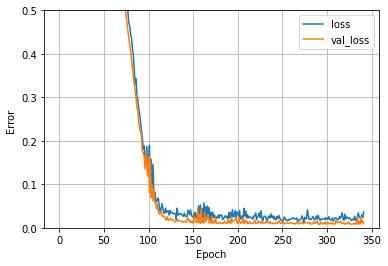

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

5/5 [==============================] - 0s 7ms/step - loss: 0.0093 - mse: 0.0093
loss test data:  0.009258284233510494
mse test data:  0.009258284233510494
5/5 [==============================] - 0s 8ms/step - loss: 0.0128 - mse: 0.0128
loss train data:  0.012764590792357922
mse train data:  0.012764590792357922


<function matplotlib.pyplot.show>

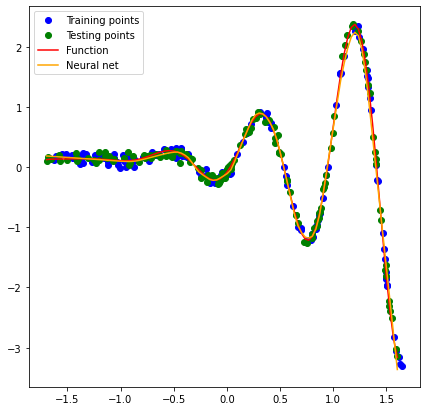

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n,yy_train_n, 'o', color='blue', label='Training points')
plt.plot(XX_test_n,yy_test_n, 'o', color='green', label='Testing points')

points = np.linspace(min(XX_test_n), max(XX_test_n),num=100)
plt.plot(points, (funct(points*std+mean)-mean1)/std1,  color='red', label='Function')

plt.plot(points, model0.predict(points),  color='orange', label='Neural net')


plt.legend()


plt.show

In [ ]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

In [ ]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study)

In [ ]:
from optuna.visualization import plot_contour

plot_contour(study)

In [ ]:
plot_contour(study, params=['units', 'dropout'])

In [ ]:
from optuna.visualization import plot_slice

plot_slice(study)

In [ ]:
plot_slice(study, params=['units', 'dropout'])

In [ ]:
from optuna.visualization import plot_param_importances

plot_param_importances(study)